In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline 
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
import re
from keras.preprocessing import sequence
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import text_to_word_sequence
from sklearn.svm import LinearSVC

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
names=['URL','Category']
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/thesis/URL Classification.csv',names=names, na_filter=False)
dataset = df[:]

adult = dataset[0:2000]
arts = dataset[50000:52000]
business = dataset[520000:522000]
computers = dataset[535300:537300]
games = dataset[650000:652000]
health = dataset[710000:712000]
home =  dataset[764200:766200]
kids =  dataset[793080:795080]
news =  dataset[839730:841730]
recreation =  dataset[850000:852000]
reference =  dataset[955250:957250]
science =  dataset[1013000:1015000]
shopping =  dataset[1143000:1145000]
society =  dataset[1293000:1295000]
sports =  dataset[1492000:1494000]

test_data = pd.concat([adult, arts, business, computers, games, health, home, 
              kids, news, recreation, reference,science, shopping, society, sports], axis=0)

dataset.drop(dataset.index[1:2000],inplace= True)
dataset.drop(dataset.index[50000:52000],inplace= True)
dataset.drop(dataset.index[520000:522000],inplace= True)
dataset.drop(dataset.index[535300:537300],inplace= True)
dataset.drop(dataset.index[650000:652000],inplace= True)
dataset.drop(dataset.index[710000:712000],inplace= True)
dataset.drop(dataset.index[764200:766200],inplace= True)
dataset.drop(dataset.index[793080:795080],inplace= True)
dataset.drop(dataset.index[839730:841730],inplace= True)
dataset.drop(dataset.index[850000:852000],inplace= True)
dataset.drop(dataset.index[955250:957250],inplace= True)
dataset.drop(dataset.index[1013000:1015000],inplace= True)
dataset.drop(dataset.index[1143000:1145000],inplace= True)
dataset.drop(dataset.index[1293000:1295000],inplace= True)
dataset.drop(dataset.index[1492000:1494000],inplace= True)
dataset.tail()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,URL,Category
1562974,http://www.maxpreps.com/,Sports
1562975,http://www.myscore.com/,Sports
1562976,http://sportsillustrated.cnn.com/highschool,Sports
1562977,http://rss.cnn.com/rss/si_highschool?format=xml,Sports
1562978,http://www.usatoday.com/sports/preps/,Sports


,URL,Category
1,http://www.liquidgeneration.com/,Adult
2,http://www.onlineanime.org/,Adult


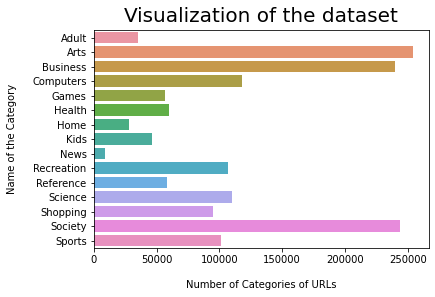

In [21]:
import seaborn as sns
ax = sns.countplot(y="Category",  data=df )
plt.title("Visualization of the dataset", y=1.01, fontsize=20)
plt.ylabel("Name of the Category", labelpad=15)
plt.xlabel("Number of Categories of URLs", labelpad=15)
df[:2]

Text(0.5, 0, 'Number of Categories of URLs')

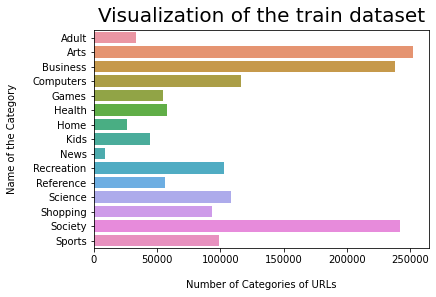

In [22]:
ax = sns.countplot(y = "Category",  data = dataset )
plt.title("Visualization of the train dataset", y=1.01, fontsize=20)
plt.ylabel("Name of the Category", labelpad=15)
plt.xlabel("Number of Categories of URLs", labelpad=15)

Text(0.5, 0, 'Number of Categories of URLs')

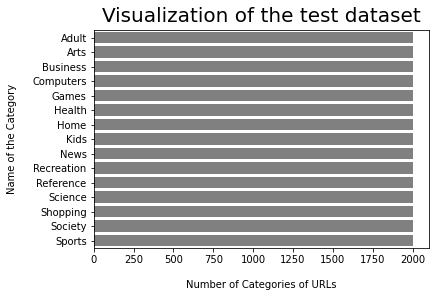

In [23]:
ax = sns.countplot(y = "Category",  data = test_data , color = 'gray')
plt.title("Visualization of the test dataset", y=1.01, fontsize=20)
plt.ylabel("Name of the Category", labelpad=15)
plt.xlabel("Number of Categories of URLs", labelpad=15)

In [24]:
X_train=dataset['URL']
y_train=dataset['Category']
#print(X_train)
X_train.shape

(1532979,)

In [25]:
X_test=test_data['URL']
y_test=test_data['Category']
#print(X_test)
X_test.shape

(30000,)

In [26]:
from sklearn.pipeline import Pipeline
import re
import nltk
nltk.download('stopwords')
stemmed_count_vect = CountVectorizer(stop_words='english', ngram_range=(1,1))
gs_clf = Pipeline([('vect', stemmed_count_vect),
                         ('tfidf', TfidfTransformer()),
                         ('mnb', MultinomialNB(fit_prior=False, alpha = 0.0001)),
   ])
gs_clf = gs_clf.fit(X_train, y_train)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
#grid_mean_scores = [result.mean_validation_score for result in gs_clf.grid_scores_]
#print(grid_mean_scores)
y_pred=gs_clf.predict(X_test)
precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.8848327495185775, 0.8804, 0.8680015044986658, None)

In [28]:
y_pred=gs_clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

       Adult     0.8762    0.2230    0.3555      2000
        Arts     0.6986    0.8240    0.7561      2000
    Business     0.9569    0.9335    0.9451      2000
   Computers     0.9022    0.9040    0.9031      2000
       Games     0.9296    0.9445    0.9370      2000
      Health     0.9620    0.9735    0.9677      2000
        Home     0.8864    0.9485    0.9164      2000
        Kids     0.8634    0.8470    0.8551      2000
        News     0.9688    0.9635    0.9662      2000
  Recreation     0.8330    0.9630    0.8933      2000
   Reference     0.7980    0.9380    0.8623      2000
     Science     0.9041    0.9000    0.9020      2000
    Shopping     0.8162    0.9745    0.8883      2000
     Society     0.9151    0.9590    0.9365      2000
      Sports     0.9619    0.9100    0.9353      2000

    accuracy                         0.8804     30000
   macro avg     0.8848    0.8804    0.8680     30000
weighted avg     0.8848   

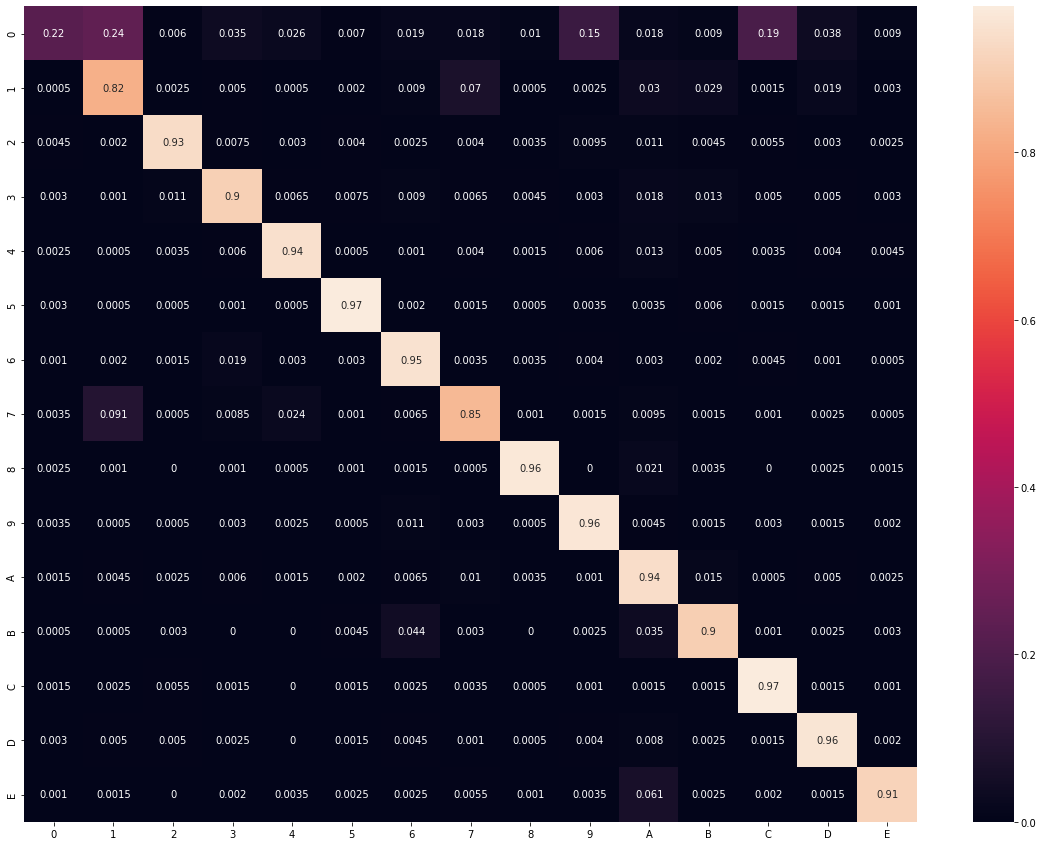

In [29]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
array = confusion_matrix(y_test, y_pred)
cm=np.array(array)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789ABCDE"],
                  columns = [i for i in "0123456789ABCDE"])
plt.figure(figsize = (20,15))
sn.heatmap(df_cm, annot=True)

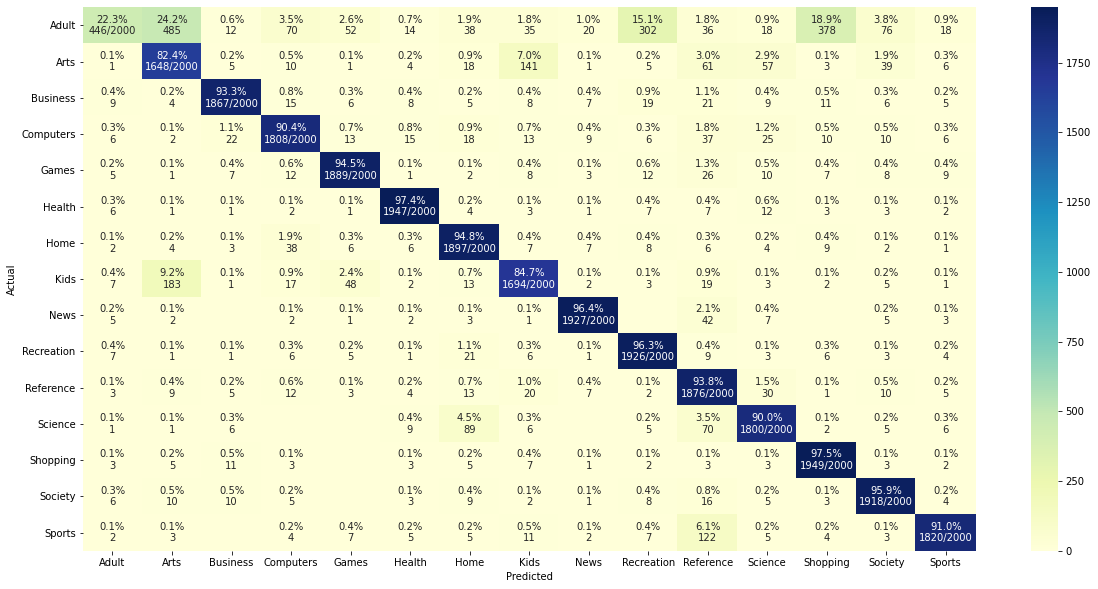

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, figsize=(20,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

plot_cm(y_test, y_pred)

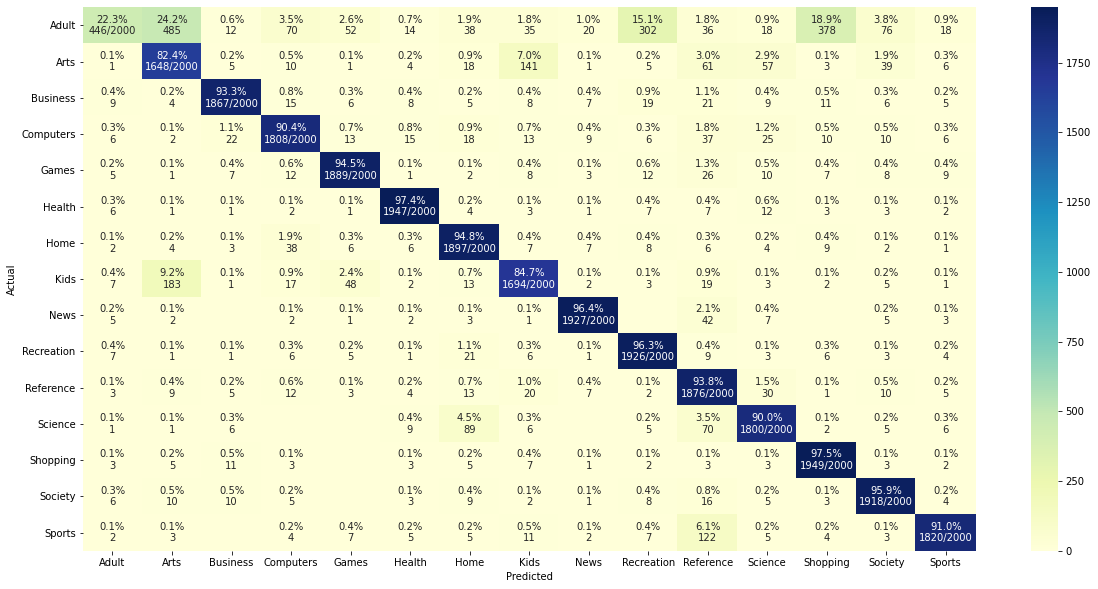

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (20,10), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

plot_cm(y_test, y_pred)

In [32]:
import sklearn.metrics as metrics
print('Naive Bayes Train Accuracy = ',metrics.accuracy_score(y_train,gs_clf.predict(X_train)))
print('Naive Bayes Test Accuracy = ',metrics.accuracy_score(y_test,gs_clf.predict(X_test)))

Naive Bayes Train Accuracy =  0.9173615555072835
Naive Bayes Test Accuracy =  0.8804


In [33]:
print(gs_clf.predict(['http://www.businesstoday.net/']))
print(gs_clf.predict(['http://www.gamespot.net/']))

['News']
['Games']
